<a href="https://colab.research.google.com/github/jsebastianquiroga/analitica_ia_puj/blob/main/Tesis/notebook_listado_estudiantes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
import statistics
import warnings
import re
# from sklearn.preprocessing import StandardScaler
from IPython.display import display
warnings.filterwarnings('ignore')
# from pandas_profiling import ProfileReport

#2. Exploración de datos.

In [ ]:
# Cargar tus datos en un DataFrame
df = pd.read_csv("/content/Listado Estudiantes.csv", delimiter=';', encoding='latin_1')


##2.2 Descripción de datos

In [ ]:
def describe_data(df):
    # Inicializar DataFrame vacío
    description_df = pd.DataFrame()

    # Agregar columnas una por una al DataFrame
    description_df['Nombre de cada campo o columna'] = df.columns
    description_df['Descripción'] = [''] * len(df.columns)  # Inicializar con cadenas vacías
    description_df['Tipo de dato'] = [str(dtype) for dtype in df.dtypes]
    description_df['Cantidad de registros no vacíos'] = df.notna().sum().values
    description_df['Cantidad de registros vacíos'] = df.isna().sum().values

    return description_df

# Llamar a la función
data_description_df = describe_data(df)

# Luego, puedes agregar las descripciones manualmente como en el paso 5 de la explicación anterior.

data_description_df


,Nombre de cada campo o columna,Descripción,Tipo de dato,Cantidad de registros no vacíos,Cantidad de registros vacíos
0,Año Semestre,,object,4862,0
1,Cuatrimestre población,,object,4862,0
2,Código Estudiante Banner,,int64,4862,0
3,Fecha Nacimiento,,object,4857,5
4,Sede,,object,4862,0
5,Código Sede,,object,4862,0
6,Rectoría/Vicerrectoría,,object,4862,0
7,Nivel Académico,,object,4862,0
8,Nivel Formación,,object,4862,0
9,Programa,,object,4862,0


In [ ]:
def describe_data(df):
    # Inicializar DataFrame vacío
    description_df = pd.DataFrame()

    # Agregar columnas una por una al DataFrame
    description_df['Nombre variable'] = df.columns
    description_df['Descripción'] = [''] * len(df.columns)  # Inicializar con cadenas vacías
    description_df['Tipo'] = [str(dtype) for dtype in df.dtypes]
    description_df['# de registros'] = df.notna().sum().values
    description_df['# de registros vacíos'] = df.isna().sum().values
    description_df['# de valores únicos'] = df.nunique().values

    # Inicializar columnas de rango y moda/mediana con valores vacíos
    description_df['Rango'] = [''] * len(df.columns)
    description_df['Moda/Mediana'] = [''] * len(df.columns)

    for idx, column in enumerate(df.columns):
        # Si la columna es numérica, calcular el rango
        if pd.api.types.is_numeric_dtype(df[column]):
            description_df.loc[idx, 'Rango'] = f'{df[column].min()} - {df[column].max()}'
            description_df.loc[idx, 'Moda/Mediana'] = df[column].median()
        # Si la columna no es numérica, calcular la moda
        else:
            description_df.loc[idx, 'Moda/Mediana'] = df[column].mode().iloc[0] if not df[column].mode().empty else ''

    return description_df

# Llamar a la función
data_description_df = describe_data(df)

# Luego, puedes agregar las descripciones manualmente como en el paso 5 de la explicación anterior.
data_description_df

,Nombre variable,Descripción,Tipo,# de registros,# de registros vacíos,# de valores únicos,Rango,Moda/Mediana
0,Año Semestre,,object,4862,0,2,,2009-01
1,Cuatrimestre población,,object,4862,0,4,,Semestre 1
2,Código Estudiante Banner,,int64,4862,0,4778,4185 - 98708458,115213.5
3,Fecha Nacimiento,,object,4857,5,2950,,26/12/90
4,Sede,,object,4862,0,22,,COA ENGATIVA PRES
5,Código Sede,,object,4862,0,22,,UMD
6,Rectoría/Vicerrectoría,,object,4862,0,7,,Rectoría UNIMINUTO Bogotá
7,Nivel Académico,,object,4862,0,1,,Pregrado
8,Nivel Formación,,object,4862,0,4,,Tecnologia
9,Programa,,object,4862,0,40,,Tecnología en Informática


## 2.3 Exploracion de datos.

In [ ]:
df.columns

Index(['Año Semestre', 'Cuatrimestre población', 'Código Estudiante Banner',
       'Fecha Nacimiento', 'Sede', 'Código Sede', 'Rectoría/Vicerrectoría',
       'Nivel Académico', 'Nivel Formación', 'Programa', 'Jornada',
       'Código Programa', 'Snies', 'Descripción Metodología',
       'Area Conocimiento', 'Código Periodo Académico Cohorte ',
       'Código Periodo Académico', 'Tipo Estudiante', 'Edad', 'Género',
       'Estado Civil', 'Estrato Social', 'Lugar Residencia'],
      dtype='object')

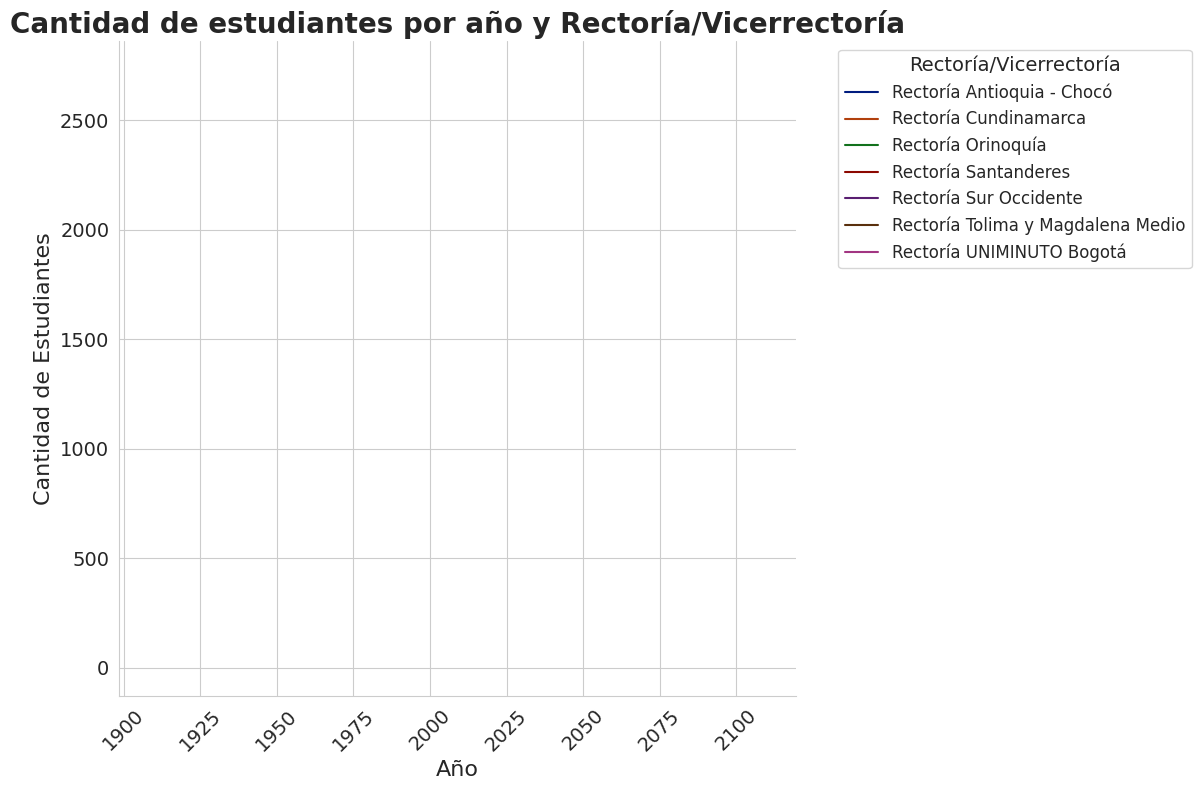

In [ ]:
df['semestre'] = df['Año Semestre'].str.split('-').str.get(1)
df['ano'] = df['Año Semestre'].str.split('-').str.get(0)

# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Rectoría/Vicerrectoría', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Rectoría/Vicerrectoría'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Rectoría/Vicerrectoría', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Rectoría/Vicerrectoría', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Rectoría/Vicerrectoría', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

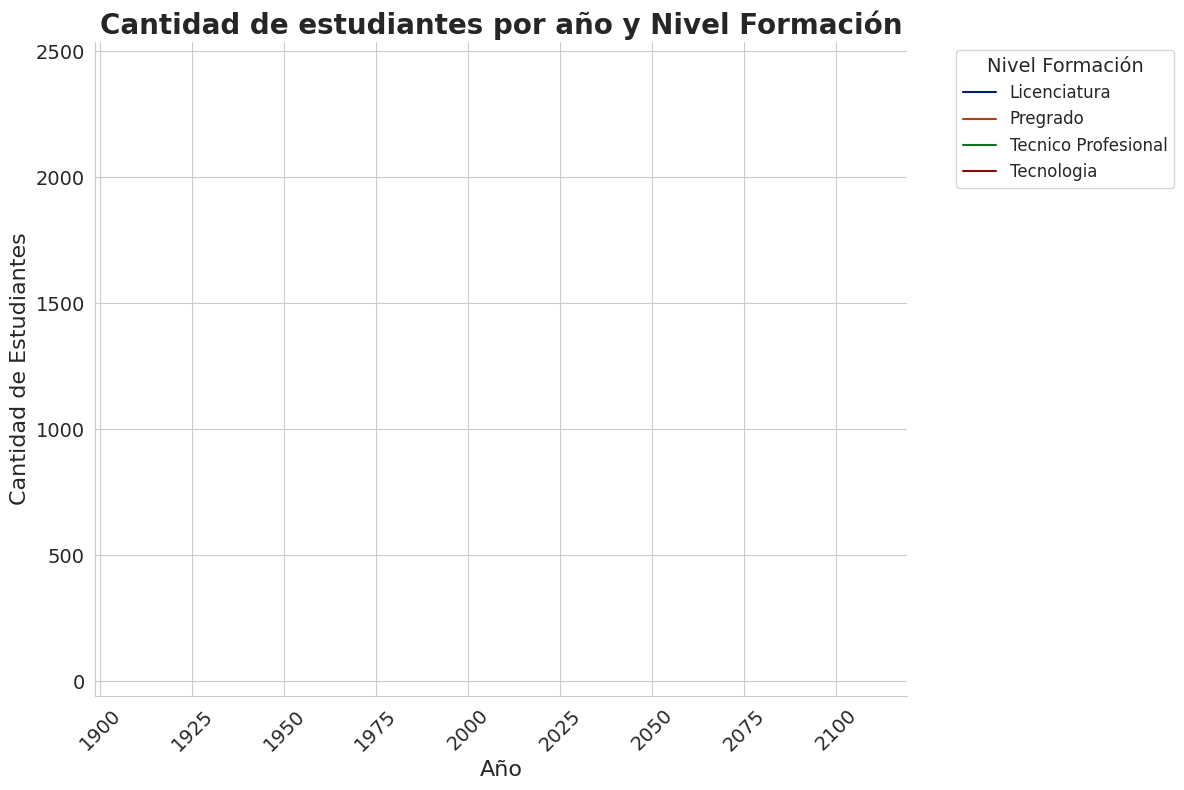

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Nivel Formación', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Nivel Formación'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Nivel Formación', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Nivel Formación', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Nivel Formación', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

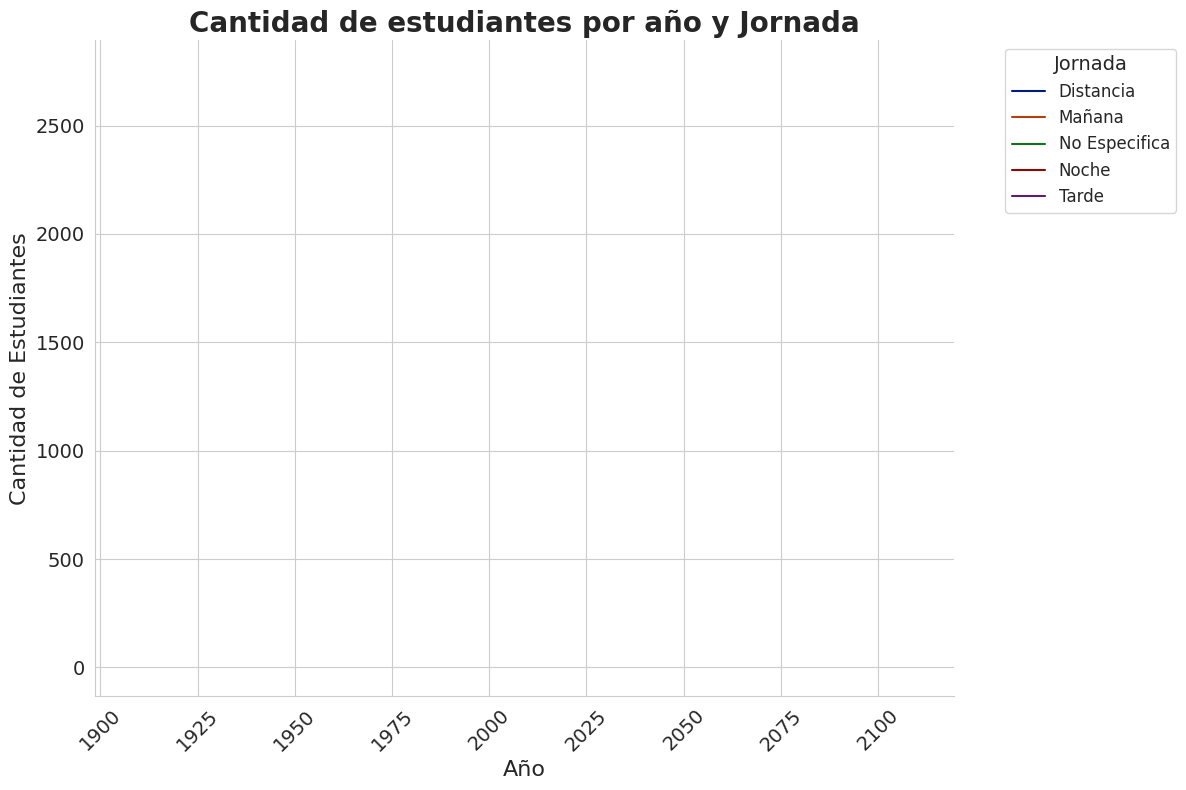

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Jornada', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Jornada'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Jornada', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Jornada', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Jornada', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

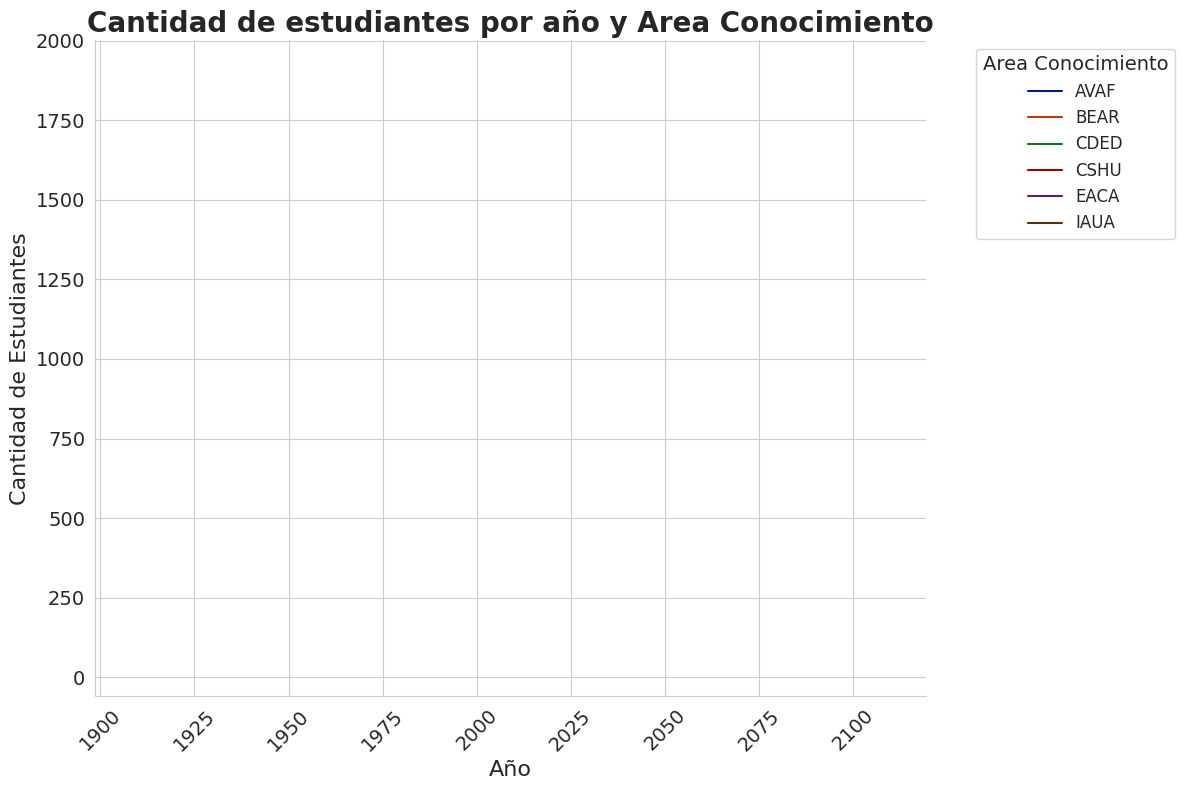

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Area Conocimiento', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Area Conocimiento'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Area Conocimiento', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Area Conocimiento', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Area Conocimiento', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

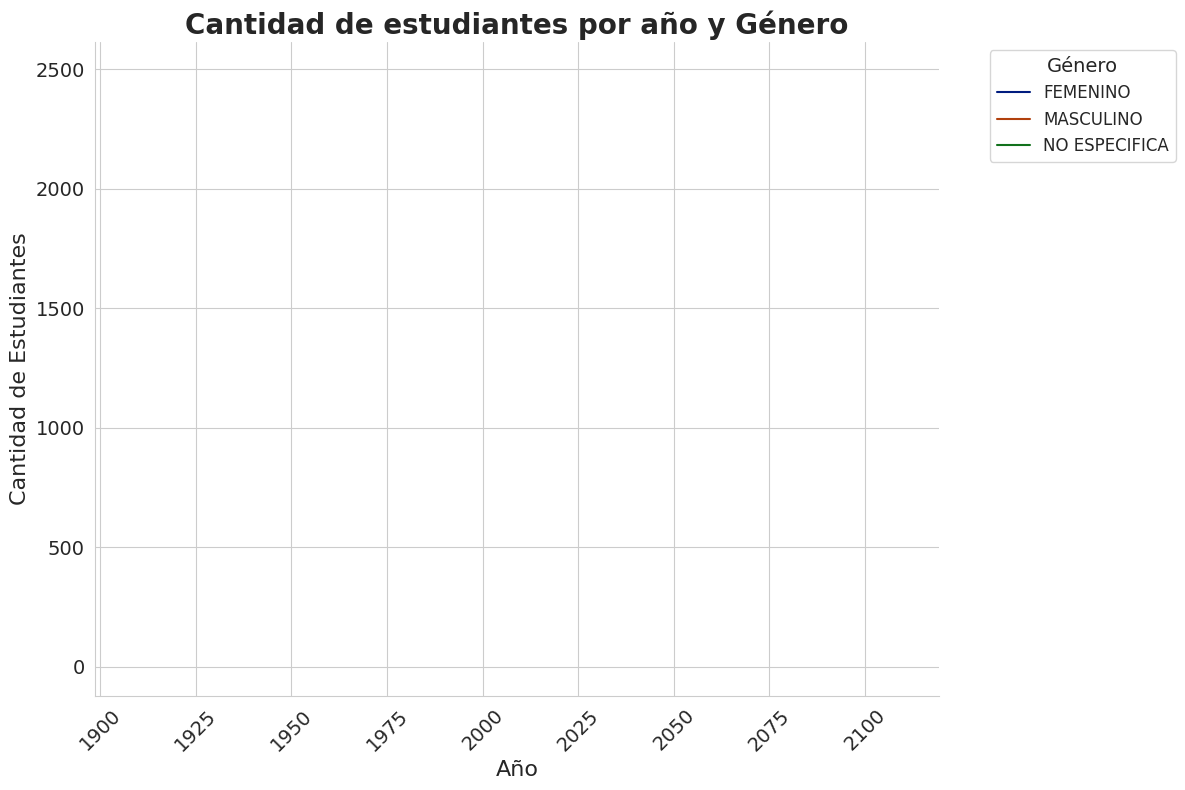

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Género', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Género'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Género', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Género', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Género', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

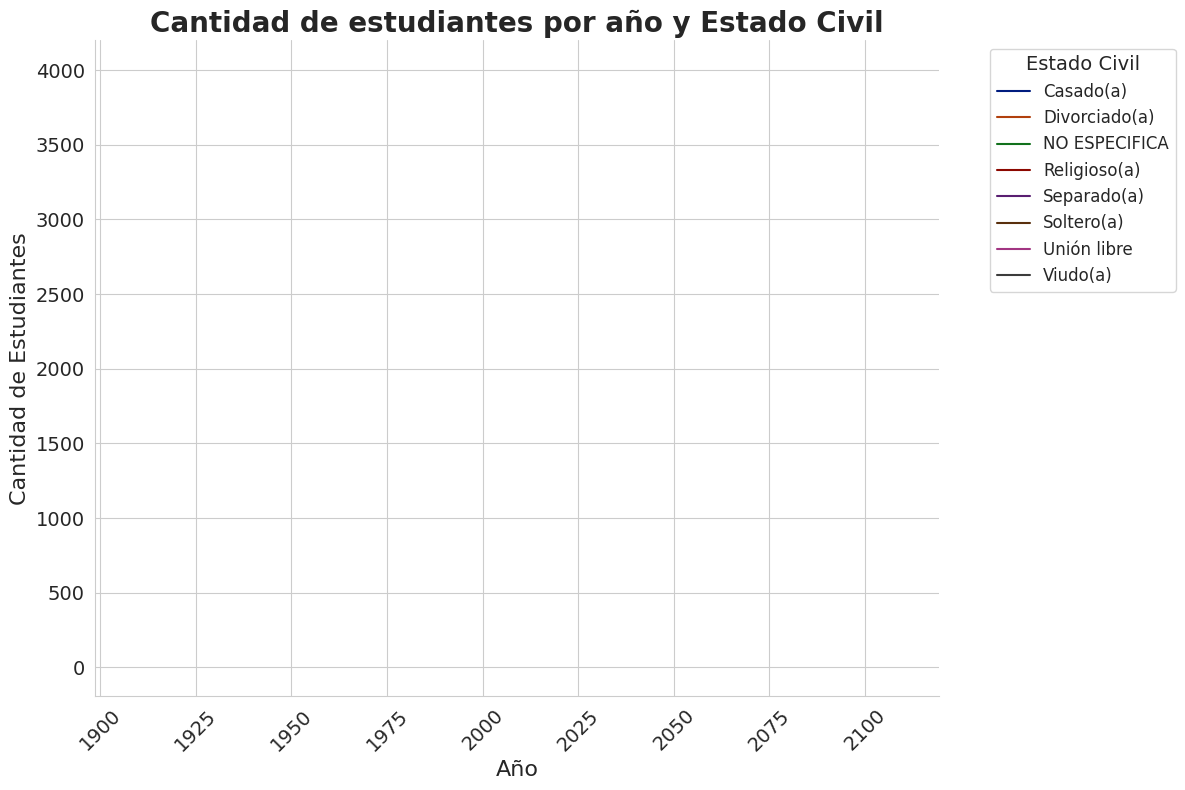

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Estado Civil', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Estado Civil'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Estado Civil', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Estado Civil', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Estado Civil', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

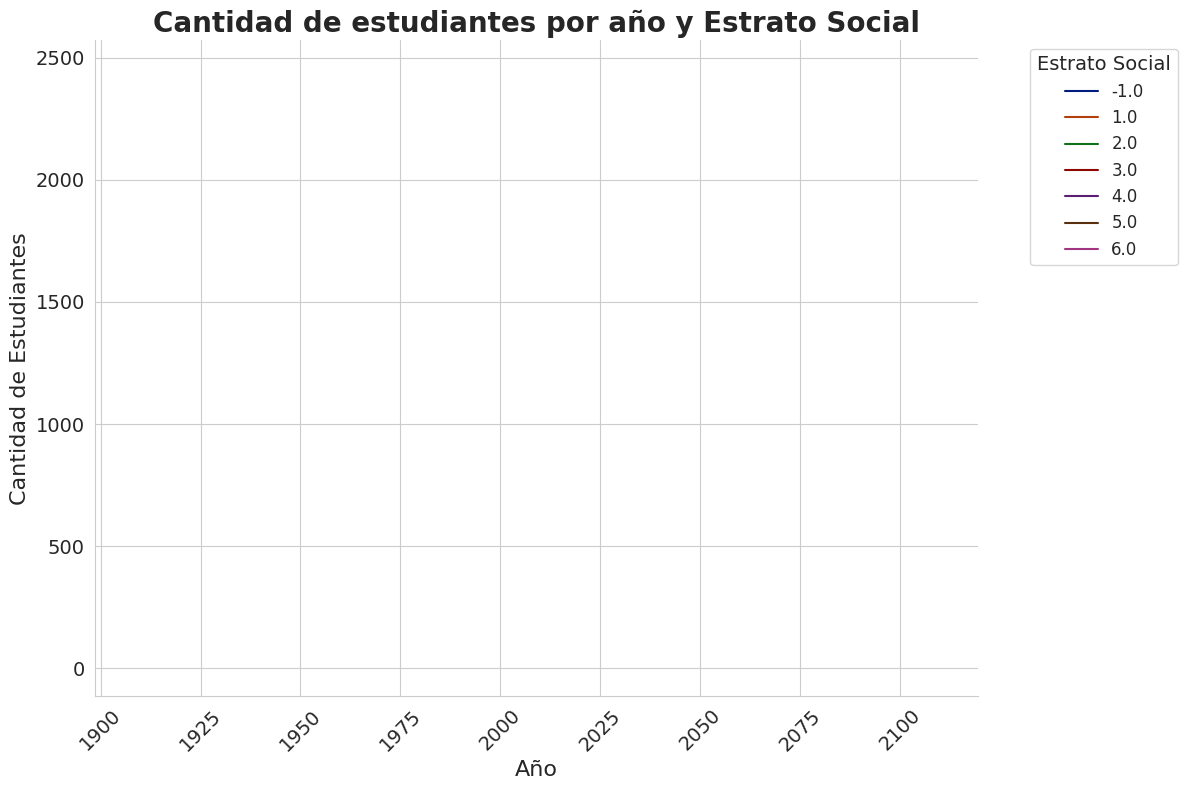

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'ano' es una columna numérica
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')

# Agrupa los datos por 'ano' y 'Estrato Social', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['ano', 'Estrato Social'])['Código Estudiante Banner'].count().reset_index()

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=datos_agrupados, x='ano', y='Código Estudiante Banner', hue='Estrato Social', palette=colores_oscuros, lw=2)
plt.title('Cantidad de estudiantes por año y Estrato Social', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de Estudiantes', fontsize=16)
plt.legend(title='Estrato Social', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

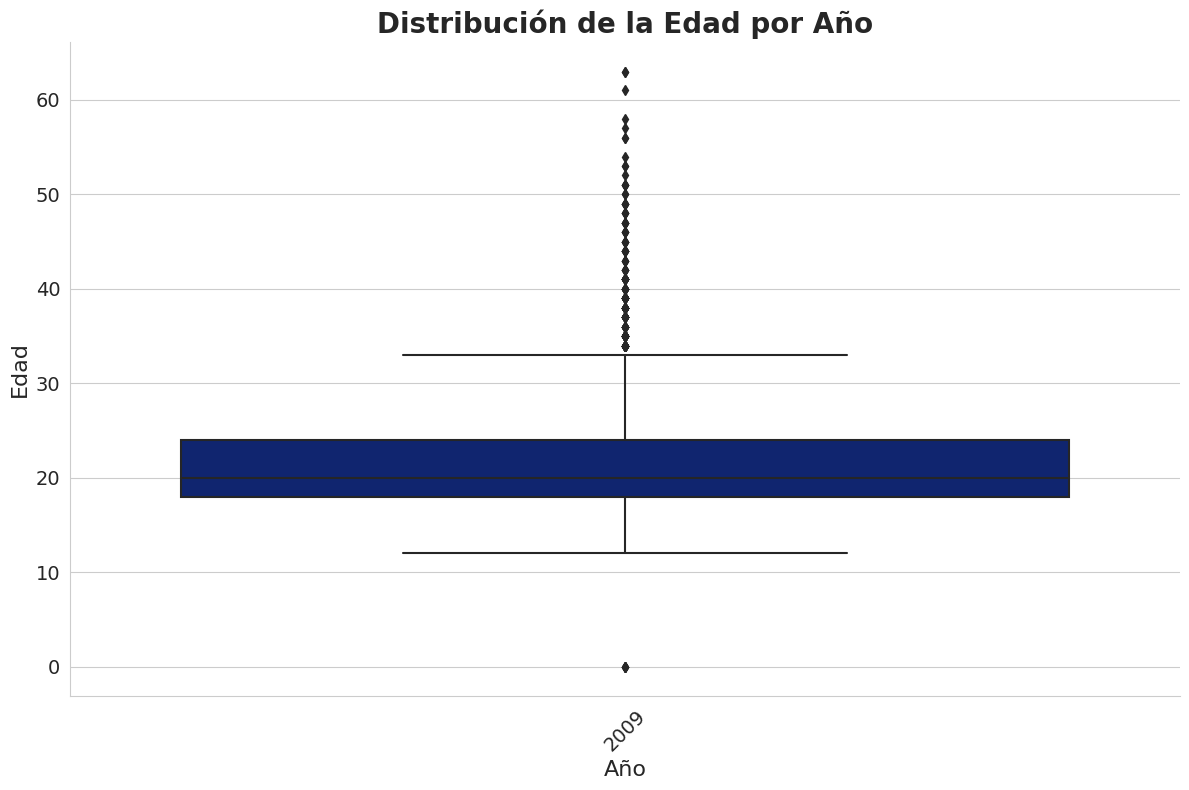

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configura el estilo de Seaborn
sns.set_style("whitegrid")

# Define una paleta de colores más oscura
colores_oscuros = sns.color_palette("dark", as_cmap=True)

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'Edad' es una columna numérica
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')

# Crea la gráfica
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df, x='ano', y='Edad', palette=colores_oscuros)
plt.title('Distribución de la Edad por Año', fontsize=20, fontweight='bold')
plt.xlabel('Año', fontsize=16)
plt.ylabel('Edad', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

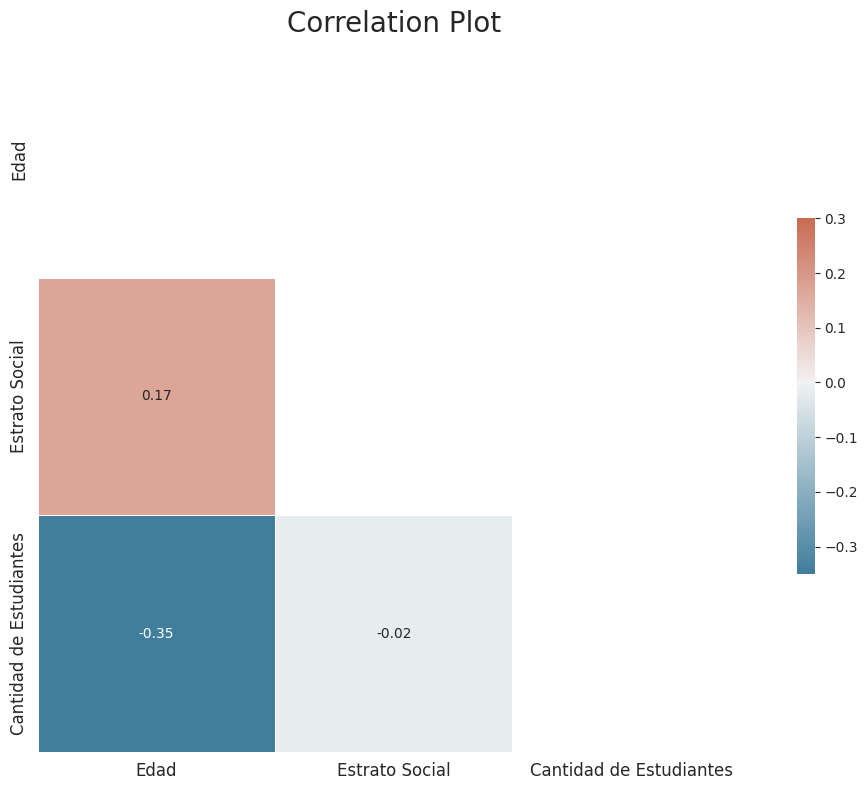

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que df es tu DataFrame
# Asegúrate de que 'Edad' y 'Estrato Social' son columnas numéricas
df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')
df['Estrato Social'] = pd.to_numeric(df['Estrato Social'], errors='coerce')

# Agrupa los datos por 'Edad' y 'Estrato Social', y cuenta la cantidad de estudiantes
datos_agrupados = df.groupby(['Edad', 'Estrato Social']).size().reset_index(name='Cantidad de Estudiantes')

# Calcula la matriz de correlación
corr = datos_agrupados.corr()

# Configura el tamaño y el estilo de la figura
plt.figure(figsize=(10, 8))
sns.set_style('white')

# Crea una máscara para la parte superior del triángulo (opcional)
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configura la paleta de colores
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dibuja el mapa de calor
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

# Configura el título y las etiquetas
plt.title('Correlation Plot', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Muestra el gráfico
plt.tight_layout()
plt.show()

In [ ]:
revisar = df[df.semestre=='01']
revisar['Cuatrimestre población'].value_counts(normalize=True)


Semestre 1        0.999452
cuatrimestre 1    0.000548
Name: Cuatrimestre población, dtype: float64

17 a 21 anos

In [ ]:
df.columns

Index(['Año Semestre', 'Cuatrimestre población', 'Código Estudiante Banner',
       'Fecha Nacimiento', 'Sede', 'Código Sede', 'Rectoría/Vicerrectoría',
       'Nivel Académico', 'Nivel Formación', 'Programa', 'Jornada',
       'Código Programa', 'Snies', 'Descripción Metodología',
       'Area Conocimiento', 'Código Periodo Académico Cohorte ',
       'Código Periodo Académico', 'Tipo Estudiante', 'Edad', 'Género',
       'Estado Civil', 'Estrato Social', 'Lugar Residencia', 'semestre',
       'ano'],
      dtype='object')

In [ ]:
df['Estrato Social'].value_counts(normalize=True)*100

 2.0    50.360008
 3.0    34.355071
 1.0    12.281424
 4.0     1.810327
-1.0     0.843448
 6.0     0.185147
 5.0     0.164575
Name: Estrato Social, dtype: float64

In [ ]:
df['Cuatrimestre población'].unique()

array(['cuatrimestre 1', 'Semestre 1', 'Cuatrimestre 3', 'Semestre 2'],
      dtype=object)

# 3. Preparación de los datos

In [ ]:
#cuatrimestre semestre 1 = 1 y 2 y semestre 1

#eliminar cursos libres.

In [ ]:
df.columns

Index(['Año Semestre', 'Cuatrimestre población', 'Código Estudiante Banner',
       'Fecha Nacimiento', 'Sede', 'Código Sede', 'Rectoría/Vicerrectoría',
       'Nivel Académico', 'Nivel Formación', 'Programa', 'Jornada',
       'Código Programa', 'Snies', 'Descripción Metodología',
       'Area Conocimiento', 'Código Periodo Académico Cohorte ',
       'Código Periodo Académico', 'Tipo Estudiante', 'Edad', 'Género',
       'Estado Civil', 'Estrato Social', 'Lugar Residencia', 'semestre',
       'ano'],
      dtype='object')

In [ ]:
df['Cuatrimestre población'].unique()

array(['cuatrimestre 1', 'Semestre 1', 'Cuatrimestre 3', 'Semestre 2'],
      dtype=object)

In [ ]:
df = df[df.Jornada!= '***No Usar**  No aplica']
df = df[df['Cuatrimestre población']!='Curso libre']
df_final = df[['ano', 'Cuatrimestre población', 'Sede', 'Rectoría/Vicerrectoría', 'Fecha Nacimiento', 'Descripción Metodología', 'Código Estudiante Banner']]
df_final

,ano,Cuatrimestre población,Sede,Rectoría/Vicerrectoría,Fecha Nacimiento,Descripción Metodología,Código Estudiante Banner
0,2009,cuatrimestre 1,COA ENGATIVA DIST,Rectoría UNIMINUTO Bogotá,6/03/83,Distancia Tradicional,109692
1,2009,cuatrimestre 1,COA ENGATIVA DIST,Rectoría UNIMINUTO Bogotá,5/03/86,Distancia Tradicional,111887
2,2009,Semestre 1,COA SOACHA,Rectoría Cundinamarca,18/02/86,Presencial,4566
3,2009,Semestre 1,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,6/02/87,Presencial,5091
4,2009,Semestre 1,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,25/08/92,Presencial,6784
...,...,...,...,...,...,...,...
4857,2009,Semestre 2,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,25/10/87,Presencial,129369
4858,2009,Semestre 2,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,21/02/92,Presencial,129371
4859,2009,Semestre 2,COA VILLAVICENCIO,Rectoría Orinoquía,30/01/86,Presencial,129372
4860,2009,Semestre 2,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,10/05/92,Presencial,129375


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

df_final['semestre'] = np.where(
    df_final['Cuatrimestre población'].isin(['cuatrimestre 1', 'Semestre 1', 'cuatrimestre 2']),
    1,
    2
)
df_final = df_final.rename(columns={
    'Rectoría/Vicerrectoría': 'Rectoria',
    'Descripción Metodología': 'Modalidad'
})

# Asegúrate de que 'Fecha Nacimiento' esté en formato datetime
df_final['Fecha Nacimiento'] = pd.to_datetime(df_final['Fecha Nacimiento'])

# Paso 2: Calcular la edad
# Asumiendo que la columna 'ano' contiene el año actual o un año específico
df_final['edad'] = df_final['ano'] - df_final['Fecha Nacimiento'].dt.year


df_final['objetivo'] = df_final['edad'].apply(lambda x: 1 if 17 <= x <= 21 else 0)


# Paso 3: Eliminar la columna 'Fecha Nacimiento'
df_final = df_final.drop(columns=['Fecha Nacimiento', 'Cuatrimestre población', 'edad'])

# Mostrar el DataFrame actualizado
df_final

,ano,Sede,Rectoria,Modalidad,Código Estudiante Banner,semestre,objetivo
0,2009,COA ENGATIVA DIST,Rectoría UNIMINUTO Bogotá,Distancia Tradicional,109692,1,0
1,2009,COA ENGATIVA DIST,Rectoría UNIMINUTO Bogotá,Distancia Tradicional,111887,1,0
2,2009,COA SOACHA,Rectoría Cundinamarca,Presencial,4566,1,0
3,2009,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,Presencial,5091,1,0
4,2009,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,Presencial,6784,1,1
...,...,...,...,...,...,...,...
4857,2009,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,Presencial,129369,2,0
4858,2009,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,Presencial,129371,2,1
4859,2009,COA VILLAVICENCIO,Rectoría Orinoquía,Presencial,129372,2,0
4860,2009,COA ENGATIVA PRES,Rectoría UNIMINUTO Bogotá,Presencial,129375,2,1


In [ ]:
def update_sede(row):
    if row['Modalidad'] == "Distancia Tradicional" and row['Sede'] == "CERES CIUDAD BOLIVAR":
        return "COA CD BOLIVAR DIST"
    elif row['Modalidad'] == "Presencial" and row['Sede'] == "CERES CIUDAD BOLIVAR":
        return "COA CD BOLIVAR PRES"
    elif row['Modalidad'] == "Distancia Tradicional" and row['Sede'] == "CO BOSA":
        return "COA BOSA DIST"
    elif row['Modalidad'] == "Presencial" and row['Sede'] == "CO BOSA":
        return "COA BOSA PRES"
    elif row['Modalidad'] == "Distancia Tradicional" and row['Sede'] == "CO KENNEDY":
        return "COA KENNEDY DIST"
    elif row['Modalidad'] == "Presencial" and row['Sede'] == "CO KENNEDY":
        return "COA KENNEDY PRES"
    elif row['Modalidad'] == "Distancia Tradicional" and row['Sede'] == "CO RAFAEL URIBE":
        return "COA RAFAEL URIBE DIST"
    elif row['Modalidad'] == "Presencial" and row['Sede'] == "CO RAFAEL URIBE":
        return "COA RAFAEL URIBE PRES"
    elif row['Modalidad'] == "CO CANDELARIA":
        return "COA ENGATIVA PRES"
    elif row['Modalidad'] == "CO TUNAL":
        return "COA ENGATIVA PRES"
    elif row['Modalidad'] == "Ceres Valle de Aburrá":
        return "COA BELLO"
    elif row['Modalidad'] == "CERES PRADO CALI":
        return "COA CALI"
    else:
        return row['Modalidad']

df_final['Modalidad'] = df_final.apply(update_sede, axis=1)
df_final['Sede'] = df_final['Sede'].replace('^COA|^CO', 'CU', regex=True)


def update_rectoria(row):
    if row['Rectoria'] == "Vicerrectoría Regional Bogotá Sur":
        return "Rectoría UNIMINUTO Bogotá"
    else:
        return row['Rectoria']

df_final['Rectoria'] = df_final.apply(update_rectoria, axis=1)

In [ ]:
df_final.columns

Index(['ano', 'Sede', 'Rectoria', 'Modalidad', 'Código Estudiante Banner',
       'semestre', 'objetivo'],
      dtype='object')

In [ ]:
import pandas as pd

# Asumiendo que ya tienes df_final
#df_agrupado = df_final.groupby(['ano', 'semestre', 'Rectoria', 'Sede', 'Modalidad', 'objetivo']).size().reset_index(name='y')
df_agrupado = df_final.groupby(['ano', 'semestre', 'Rectoria', 'Modalidad', 'objetivo']).size().reset_index(name='y')


# Identificador unico por timeseries.
#df_agrupado['unique_id'] = df_agrupado.groupby(['Rectoria', 'Sede', 'Modalidad', 'objetivo']).ngroup() + 1
df_agrupado['unique_id'] = df_agrupado.groupby(['Rectoria', 'Modalidad', 'objetivo']).ngroup() + 1

def grouped_data(df):
    if df.empty:
        print("DataFrame is empty.")
        return df
    if "unique_id" not in df.columns:
        print("'unique_id' column does not exist in the DataFrame.")
        return df

    grouped = df.groupby(["unique_id"], as_index=False).agg(
        {"y": ["mean", "std"]}
    )
    grouped.columns = grouped.columns.map("_".join)
    grouped = grouped.reset_index(drop=True).rename(
        columns={"unique_id_": "unique_id"}
    )
    grouped["y_std"] = grouped["y_std"].fillna(0)
    grouped["upper_limit"] = grouped["y_mean"] + 3 * grouped["y_std"]
    grouped["lower_limit"] = grouped["y_mean"] - 3 * grouped["y_std"]

    df = df.merge(grouped, how="left", on="unique_id")
    df.loc[
        (df["y"] > df["upper_limit"])
        | (df["y"] < df["lower_limit"]),
        "y",
    ] = df["y_mean"]
    df = df[df.y > 0]

    return df

df_agrupado = grouped_data(df_agrupado)

# Asumiendo que df_transformed es tu DataFrame y que 'ano' y 'semestre' son las columnas de interés
df_agrupado['time_index'] = (df_agrupado['ano'] - df_agrupado['ano'].min()) * 2 + df_agrupado['semestre']

# Convertir 'time_index' a entero si es necesario (por si 'semestre' es una columna de tipo string)
df_agrupado['time_index'] = df_agrupado['time_index'].astype(int)


df_agrupado

,ano,semestre,Rectoria,Modalidad,objetivo,y,unique_id,y_mean,y_std,upper_limit,lower_limit,time_index
0,2009,1,Rectoría Antioquia - Chocó,Presencial,0,201,2,137.5,89.802561,406.907684,-131.907684,1
1,2009,1,Rectoría Antioquia - Chocó,Presencial,1,177,3,132.5,62.932504,321.297511,-56.297511,1
2,2009,1,Rectoría Cundinamarca,Distancia Tradicional,0,41,4,21.5,27.577164,104.231493,-61.231493,1
3,2009,1,Rectoría Cundinamarca,Distancia Tradicional,1,10,5,6.0,5.656854,22.970563,-10.970563,1
4,2009,1,Rectoría Cundinamarca,Presencial,0,281,6,176.5,147.785317,619.855952,-266.855952,1
5,2009,1,Rectoría Cundinamarca,Presencial,1,557,7,326.5,325.976226,1304.428678,-651.428678,1
6,2009,1,Rectoría Orinoquía,Distancia Tradicional,0,6,8,4.0,2.828427,12.485281,-4.485281,1
7,2009,1,Rectoría Orinoquía,Distancia Tradicional,1,2,9,1.5,0.707107,3.621320,-0.621320,1
8,2009,1,Rectoría Orinoquía,Presencial,0,39,10,28.0,15.556349,74.669048,-18.669048,1
9,2009,1,Rectoría Orinoquía,Presencial,1,82,11,51.0,43.840620,182.521861,-80.521861,1


In [ ]:
a = df_agrupado[['ano', 'semestre', 'time_index', 'Rectoria']]
unique_rows = a.drop_duplicates()
unique_rows

,ano,semestre,time_index,Rectoria
0,2009,1,1,Rectoría Antioquia - Chocó
2,2009,1,1,Rectoría Cundinamarca
6,2009,1,1,Rectoría Orinoquía
10,2009,1,1,Rectoría Santanderes
13,2009,1,1,Rectoría Sur Occidente
15,2009,1,1,Rectoría Tolima y Magdalena Medio
17,2009,1,1,Rectoría UNIMINUTO Bogotá
21,2009,2,2,Rectoría Antioquia - Chocó
24,2009,2,2,Rectoría Cundinamarca
28,2009,2,2,Rectoría Orinoquía


In [ ]:
# Combine 'ano' and 'semestre' into a single period column
unique_rows['period'] = unique_rows['ano'].astype(str) + '-' + unique_rows['semestre'].astype(str)

# Grouping by 'Rectoria' and performing the aggregation
grouped = unique_rows.groupby('Rectoria').agg({
    'period': ['min', 'max'],
    'time_index': 'count'
}).reset_index()

# Flattening the column names and renaming for clarity
grouped.columns = ['_'.join(col).strip() if col[1] else col[0] for col in grouped.columns.values]
grouped.rename(columns={
    'period_min': 'Start_Period',
    'period_max': 'End_Period',
    'time_index_count': 'Num_Semesters'
}, inplace=True)

grouped[['Rectoria', 'Num_Semesters', 'Start_Period', 'End_Period']]


,Rectoria,Num_Semesters,Start_Period,End_Period
0,Rectoría Antioquia - Chocó,2,2009-1,2009-2
1,Rectoría Cundinamarca,2,2009-1,2009-2
2,Rectoría Orinoquía,2,2009-1,2009-2
3,Rectoría Santanderes,2,2009-1,2009-2
4,Rectoría Sur Occidente,2,2009-1,2009-2
5,Rectoría Tolima y Magdalena Medio,1,2009-1,2009-1
6,Rectoría UNIMINUTO Bogotá,2,2009-1,2009-2


In [ ]:
df_agrupado.unique_id.nunique()

23

In [ ]:
df_agrupado.to_excel('por_rectoria.xlsx')

# 4. Modelado

Se realizaran una validación de diferentes metodos y X, para validar la mejor estrategia.

In [ ]:
pip install statsforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.0/275.0 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.2 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 8.2 MB/s eta 0:00:00
  Created wheel for fugue-sql-antlr: filename=fugue_sql_antlr-0.1.8-py3-none-any.whl size=158201 sha256=fe4e8bc16668346c48dec6d11699c15ef98771d609971183e88e1dc3dbc64b4c
  Stored in directory: /root/.cache/pip/wheels/a4/2b/3e/8ac985ad100a8f27de940864344fe14f47bc3d2fed7f29bf70
Successfully built fugue-sql-antlr


In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [ ]:
pip install lightgbm==3.3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


#4.1. Matriz original division en train y test.

In [ ]:
import pandas as pd

# Creando el dataset de entrenamiento
train = df_agrupado.loc[df_agrupado['time_index'] <= 20]

# Creando el dataset de validación
validation = df_agrupado.loc[(df_agrupado['time_index'] >= 21) & (df_agrupado['time_index'] <= 25)]

# Creando el dataset de prueba
test = df_agrupado.loc[(df_agrupado['time_index'] >= 26) & (df_agrupado['time_index'] <= 30)]

In [ ]:
num_time_index_train = train['time_index'].nunique()
num_time_index_validation = validation['time_index'].nunique()
num_time_index_test = test['time_index'].nunique()

print(f"Number of unique time indices in train: {num_time_index_train}")
print(f"Number of unique time indices in validation: {num_time_index_validation}")
print(f"Number of unique time indices in test: {num_time_index_test}")

Number of unique time indices in train: 2
Number of unique time indices in validation: 0
Number of unique time indices in test: 0


## 4.1.1. Entrenamiento modelos.

In [ ]:
!git clone https://github.com/jsebastianquiroga/analitica_ia_puj.git

Cloning into 'analitica_ia_puj'...
remote: Enumerating objects: 635, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 635 (delta 120), reused 4 (delta 4), pack-reused 475
Receiving objects: 100% (635/635), 16.52 MiB | 20.49 MiB/s, done.
Resolving deltas: 100% (460/460), done.
Updating files: 100% (98/98), done.


In [ ]:
df = train.append(validation)

from analitica_ia_puj.Tesis.models import Autoregresive, GradientBoostingModels


# se realiza la predicción de los datos reales menos los ultimos 'meses_predecir' seleccionado, tanto en el ETL como parametros de entrada.
# validacion, es una copia del test con las predicciones para elegir el mejor modelo
forecasting = Autoregresive(train, validation, df, season_length=2, semestres_predecir=5)
validacion = forecasting.run_workflow()

train_f = train.append(validation)
test_f = test.copy()
df_f = train_f.append(test_f)

forecasting_2 = Autoregresive(
    train_f, test_f, df_f, season_length=2, semestres_predecir=5)


teste = forecasting_2.run_workflow()
#forecasting.save_model()  # Aquí guardamos el modelo

# se crean 3 modelos de regresión con boosting, toma como datos de entrada train, los datos menos los 'meses_predecir' seleccionado,
# validación es el periodo dado por esos últimos n meses, test_f datos de inferencia, y para validación y teste, son  matrices con inferencias del modelo anterior.
fore = GradientBoostingModels(train, validation, test_f, validacion, teste)
validacion, teste = fore.pipeline()
#fore.save_models()   # Guardar los modelos
validacion


#4.2 crear dos datasets distintos, uno para cada semestre para predecir anual, siendo dos modelos que predigan.

In [ ]:
# Assuming df_agrupado is already loaded as per your provided code

# Splitting the dataset into two datasets based on the semester
df_semester_1 = df_agrupado[df_agrupado['semestre'] == 1].copy()  # Using copy() to avoid warnings
df_semester_2 = df_agrupado[df_agrupado['semestre'] == 2].copy()

# Function to reset time_index for continuity
def reset_time_index(df):
    sorted_unique_time = sorted(df['time_index'].unique())
    mapping = {time: idx+1 for idx, time in enumerate(sorted_unique_time)}
    df['time_index'] = df['time_index'].map(mapping)
    return df

def split_data_exact(df):
    unique_time_indices = sorted(df['time_index'].unique())

    train_cutoff = unique_time_indices[8] if len(unique_time_indices) > 9 else unique_time_indices[-1]
    validation_cutoff = unique_time_indices[11] if len(unique_time_indices) > 12 else unique_time_indices[-1]

    train = df[df['time_index'] <= train_cutoff]
    validation = df[(df['time_index'] > train_cutoff) & (df['time_index'] <= validation_cutoff)]
    test = df[df['time_index'] > validation_cutoff]

    return train, validation, test

# Resetting time_index for continuity
df_semester_1 = reset_time_index(df_semester_1)
df_semester_2 = reset_time_index(df_semester_2)

# Getting train, validation, and test datasets for both semesters using the exact split function
train_1, validation_1, test_1 = split_data_exact(df_semester_1)
train_2, validation_2, test_2 = split_data_exact(df_semester_2)

# Counting unique time_index values for each dataset
num_time_index_train_1 = train_1['time_index'].nunique()
num_time_index_validation_1 = validation_1['time_index'].nunique()
num_time_index_test_1 = test_1['time_index'].nunique()

num_time_index_train_2 = train_2['time_index'].nunique()
num_time_index_validation_2 = validation_2['time_index'].nunique()
num_time_index_test_2 = test_2['time_index'].nunique()

print(f"Number of unique time indices in train_1: {num_time_index_train_1}")
print(f"Number of unique time indices in validation_1: {num_time_index_validation_1}")
print(f"Number of unique time indices in test_1: {num_time_index_test_1}")

print(f"Number of unique time indices in train_2: {num_time_index_train_2}")
print(f"Number of unique time indices in validation_2: {num_time_index_validation_2}")
print(f"Number of unique time indices in test_2: {num_time_index_test_2}")

Number of unique time indices in train_1: 9
Number of unique time indices in validation_1: 3
Number of unique time indices in test_1: 3
Number of unique time indices in train_2: 9
Number of unique time indices in validation_2: 3
Number of unique time indices in test_2: 3


## 4.2.1 Semestre 1 predicción

In [ ]:
df_1 = train_1.append(validation_1)

from analitica_ia_puj.Tesis.models import Autoregresive, GradientBoostingModels


# se realiza la predicción de los datos reales menos los ultimos 'meses_predecir' seleccionado, tanto en el ETL como parametros de entrada.
# validacion, es una copia del test con las predicciones para elegir el mejor modelo
forecasting_1 = Autoregresive(train_1, validation_1, df_1, season_length=2, semestres_predecir=3)
validacion_1 = forecasting_1.run_workflow()

train_f_1 = train_1.append(validation_1)
test_f_1 = test_1.copy()
df_f_1 = train_f_1.append(test_f_1)

forecasting_2_1 = Autoregresive(
    train_f_1, test_f_1, df_f_1, season_length=2, semestres_predecir=3)


teste_1 = forecasting_2_1.run_workflow()
#forecasting.save_model()  # Aquí guardamos el modelo

# se crean 3 modelos de regresión con boosting, toma como datos de entrada train, los datos menos los 'meses_predecir' seleccionado,
# validación es el periodo dado por esos últimos n meses, test_f datos de inferencia, y para validación y teste, son  matrices con inferencias del modelo anterior.
fore_1 = GradientBoostingModels(train_1, validation_1, test_f_1, validacion_1, teste_1)
validacion_1, teste_1 = fore_1.pipeline()
#fore.save_models()   # Guardar los modelos
validacion_1


[1]	valid_0's l2: 243491
[2]	valid_0's l2: 210363
[3]	valid_0's l2: 183980
[4]	valid_0's l2: 164661
[5]	valid_0's l2: 147268
[6]	valid_0's l2: 133694
[7]	valid_0's l2: 122437
[8]	valid_0's l2: 114789
[9]	valid_0's l2: 107705
[10]	valid_0's l2: 102083
[11]	valid_0's l2: 98376.4
[12]	valid_0's l2: 94786.2
[13]	valid_0's l2: 92010.8
[14]	valid_0's l2: 90174.9
[15]	valid_0's l2: 88461.1
[16]	valid_0's l2: 87070.4
[17]	valid_0's l2: 86620.2
[18]	valid_0's l2: 85272.2
[19]	valid_0's l2: 85123.6
[20]	valid_0's l2: 84664.2
[21]	valid_0's l2: 83909.4
[22]	valid_0's l2: 82889.9
[23]	valid_0's l2: 82799.3
[24]	valid_0's l2: 82348.7
[25]	valid_0's l2: 82969.3
[26]	valid_0's l2: 82872.1
[27]	valid_0's l2: 83865.2
[28]	valid_0's l2: 84094.6
[29]	valid_0's l2: 84608.9
[30]	valid_0's l2: 84534.8
[31]	valid_0's l2: 85481.3
[32]	valid_0's l2: 86065.1
[33]	valid_0's l2: 87183
[34]	valid_0's l2: 88598.6
[0]	validation_0-rmse:378.90269
[1]	validation_0-rmse:287.53620
[2]	validation_0-rmse:243.95790
[3]	val

,ano,semestre,Rectoria,Modalidad,objetivo,y,unique_id,y_mean,y_std,upper_limit,...,y_AutoCES,y_AutoTheta,y_SeasonalNaive,y_ADIDA,y_CrostonClassic,y_IMAPA,y_TSB,y_lightgbm,y_xgboost,y_catboost
0,2018,1,Rectoría Antioquia - Chocó,Distancia Tradicional,0,565.0,1,511.576923,224.074126,1183.799300,...,0,0,0,0,0,0,0,770.749386,723.656250,731.713439
1,2018,1,Rectoría Antioquia - Chocó,Distancia Tradicional,1,259.0,2,198.538462,83.621639,449.403378,...,0,0,0,0,0,0,0,318.554943,391.696442,313.365375
2,2018,1,Rectoría Antioquia - Chocó,Presencial,0,311.0,3,306.000000,79.033384,543.100153,...,0,0,0,0,0,0,0,439.873181,430.395416,384.262874
3,2018,1,Rectoría Antioquia - Chocó,Presencial,1,390.0,4,357.433333,130.572924,749.152106,...,0,0,0,0,0,0,0,534.606658,571.114136,514.264677
4,2018,1,Rectoría Caribe,Distancia Tradicional,0,635.0,5,416.807692,205.991848,1034.783237,...,0,0,0,0,0,0,0,497.025942,571.114136,585.598679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2020,1,Rectoría Tolima y Magdalena Medio,Presencial,1,53.0,36,54.352941,67.805735,257.770145,...,0,0,0,0,0,0,0,99.273671,185.405533,215.784988
100,2020,1,Rectoría UNIMINUTO Bogotá,Distancia Tradicional,0,1803.0,37,1853.733333,1236.913147,5564.472774,...,0,0,0,0,0,0,0,1927.128095,2682.143799,2517.266069
101,2020,1,Rectoría UNIMINUTO Bogotá,Distancia Tradicional,1,356.0,38,397.800000,246.641356,1137.724069,...,0,0,0,0,0,0,0,759.329024,701.227417,642.572598
102,2020,1,Rectoría UNIMINUTO Bogotá,Presencial,0,937.0,39,896.433333,212.651355,1534.387399,...,0,0,0,0,0,0,0,1398.983209,797.786987,925.859585


## 4.2.2. Prediccion semestre 2

In [ ]:
df_2 = train_2.append(validation_2)

from analitica_ia_puj.Tesis.models import Autoregresive, GradientBoostingModels


# se realiza la predicción de los datos reales menos los ultimos 'meses_predecir' seleccionado, tanto en el ETL como parametros de entrada.
# validacion, es una copia del test con las predicciones para elegir el mejor modelo
forecasting_2 = Autoregresive(train_2, validation_2, df_2, season_length=2, semestres_predecir=3)
validacion_2 = forecasting_2.run_workflow()

train_f_2 = train_2.append(validation_2)
test_f_2 = test_2.copy()
df_f_2 = train_f_2.append(test_f_2)

forecasting_2_2 = Autoregresive(
    train_f_2, test_f_2, df_f_2, season_length=2, semestres_predecir=3)


teste_2 = forecasting_2_2.run_workflow()
#forecasting.save_model()  # Aquí guardamos el modelo

# se crean 3 modelos de regresión con boosting, toma como datos de entrada train, los datos menos los 'meses_predecir' seleccionado,
# validación es el periodo dado por esos últimos n meses, test_f datos de inferencia, y para validación y teste, son  matrices con inferencias del modelo anterior.
fore_2 = GradientBoostingModels(train_2, validation_2, test_f_2, validacion_2, teste_2)
validacion_2, teste_2 = fore_2.pipeline()
#fore.save_models()   # Guardar los modelos
validacion_2


[1]	valid_0's l2: 89321.7
[2]	valid_0's l2: 80551.2
[3]	valid_0's l2: 74008.7
[4]	valid_0's l2: 69415.9
[5]	valid_0's l2: 67063.3
[6]	valid_0's l2: 65745.7
[7]	valid_0's l2: 65855.9
[8]	valid_0's l2: 66176.9
[9]	valid_0's l2: 67162.7
[10]	valid_0's l2: 68375.7
[11]	valid_0's l2: 69581.5
[12]	valid_0's l2: 71554.5
[13]	valid_0's l2: 73380.1
[14]	valid_0's l2: 75549.2
[15]	valid_0's l2: 77128.1
[16]	valid_0's l2: 78907
[0]	validation_0-rmse:262.94111
[1]	validation_0-rmse:252.77835
[2]	validation_0-rmse:264.86551
[3]	validation_0-rmse:283.18111
[4]	validation_0-rmse:300.06550
[5]	validation_0-rmse:312.73849
[6]	validation_0-rmse:323.92028
[7]	validation_0-rmse:333.87307
[8]	validation_0-rmse:340.20535
[9]	validation_0-rmse:346.05360
[10]	validation_0-rmse:351.08967
[11]	validation_0-rmse:354.15985
Learning rate set to 0.041766
0:	learn: 408.9131496	test: 315.7100130	best: 315.7100130 (0)	total: 636us	remaining: 635ms
1:	learn: 397.9847699	test: 307.5823692	best: 307.5823692 (1)	total: 1.

,ano,semestre,Rectoria,Modalidad,objetivo,y,unique_id,y_mean,y_std,upper_limit,...,y_AutoCES,y_AutoTheta,y_SeasonalNaive,y_ADIDA,y_CrostonClassic,y_IMAPA,y_TSB,y_lightgbm,y_xgboost,y_catboost
0,2018,2,Rectoría Antioquia - Chocó,Distancia Tradicional,0,31.0,1,511.576923,224.074126,1183.799300,...,0,0,0,0,0,0,0,531.099539,517.599854,490.292813
1,2018,2,Rectoría Antioquia - Chocó,Distancia Tradicional,1,13.0,2,198.538462,83.621639,449.403378,...,0,0,0,0,0,0,0,289.543137,322.289734,322.834149
2,2018,2,Rectoría Antioquia - Chocó,Presencial,0,324.0,3,306.000000,79.033384,543.100153,...,0,0,0,0,0,0,0,395.988055,389.537842,325.602257
3,2018,2,Rectoría Antioquia - Chocó,Presencial,1,322.0,4,357.433333,130.572924,749.152106,...,0,0,0,0,0,0,0,395.988055,389.537842,371.276088
4,2018,2,Rectoría Caribe,Distancia Tradicional,0,99.0,5,416.807692,205.991848,1034.783237,...,0,0,0,0,0,0,0,450.845386,440.401855,416.724353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,2020,2,Rectoría Tolima y Magdalena Medio,Presencial,1,17.0,36,54.352941,67.805735,257.770145,...,0,0,0,0,0,0,0,208.954900,201.253159,211.837052
104,2020,2,Rectoría UNIMINUTO Bogotá,Distancia Tradicional,0,1202.0,37,1853.733333,1236.913147,5564.472774,...,0,0,0,0,0,0,0,801.587195,1037.388916,1042.046505
105,2020,2,Rectoría UNIMINUTO Bogotá,Distancia Tradicional,1,215.0,38,397.800000,246.641356,1137.724069,...,0,0,0,0,0,0,0,431.623883,440.401855,431.047379
106,2020,2,Rectoría UNIMINUTO Bogotá,Presencial,0,460.0,39,896.433333,212.651355,1534.387399,...,0,0,0,0,0,0,0,801.587195,565.982117,675.695142


# 4.3 agregar al df original variables predictoras de passport.

#5. Validacion de predicciones.

In [ ]:
from analitica_ia_puj.Tesis.inference import ModelEvaluator


evaluator = ModelEvaluator(validacion = validacion, test =teste)
evaluacion, validacion_final, prediccion_final = evaluator.pipeline()

evaluacion

,Modelo,mae,mape,mse,rmse,mase,smape,mda,cfe,bias,ts,hit_rate
0,y_AutoARIMA,217.527628,71.949438,130081.563999,360.668219,0.690431,110.583249,38.674033,30117.433468,165.480404,138.453371,0.296703
0,y_AutoETS,210.817355,71.046354,125851.540226,354.755606,0.669132,68.906001,69.613260,-10226.624050,-56.190242,-48.509403,0.384615
0,y_AutoCES,147.740715,57.270576,56722.599370,238.165067,0.468928,66.788613,65.745856,7093.736633,38.976575,48.014771,0.412088
0,y_AutoTheta,185.055563,67.740412,93379.760761,305.581022,0.587365,63.702500,69.613260,-5811.396626,-31.930751,-31.403523,0.390110
0,y_SeasonalNaive,181.390110,63.270375,97153.016484,311.693786,0.575731,68.318330,76.795580,-8191.000000,-45.005495,-45.156817,0.346154
0,y_ADIDA,129.307091,55.443210,43692.951412,209.028590,0.410420,48.616739,89.502762,-10516.781523,-57.784514,-81.331823,0.461538
0,y_CrostonClassic,120.803175,57.489976,37126.741256,192.683007,0.383428,53.221874,83.425414,-6281.885616,-34.515855,-52.000998,0.434066
0,y_IMAPA,129.307091,55.443210,43692.951412,209.028590,0.410420,48.616739,89.502762,-10516.781523,-57.784514,-81.331823,0.461538
0,y_TSB,138.277813,60.221474,49545.085407,222.587253,0.438893,51.791322,89.502762,-13836.514360,-76.024804,-100.063156,0.434066
0,y_lightgbm,97.606755,89.641477,24575.858447,156.766892,0.309803,39.853179,85.082873,-7901.872073,-43.416880,-80.956201,0.521978


In [ ]:
from collections import Counter

evaluator_best_model_dict = evaluator.best_model_dict
value_counts = Counter(evaluator_best_model_dict.values())
value_counts

Counter({'y_lightgbm': 7,
         'y_catboost': 15,
         'y_ADIDA': 1,
         'y_AutoTheta': 2,
         'y_xgboost': 4,
         'y_AutoCES': 2,
         'y_AutoARIMA': 5,
         'y_SeasonalNaive': 1,
         'y_AutoETS': 1})

In [ ]:
from analitica_ia_puj.Tesis.inference import ModelEvaluator


evaluator_1 = ModelEvaluator(validacion = validacion_1, test =teste_1)
evaluacion_1, validacion_final_1, prediccion_final_1 = evaluator_1.pipeline()

evaluacion_1

,Modelo,mae,mape,mse,rmse,mase,smape,mda,cfe,bias,ts,hit_rate
0,y_AutoARIMA,493.490385,100.000000,528374.259615,726.893568,1.219635,200.000000,0.000000,51323.000000,493.490385,104.000000,0.000000
0,y_AutoETS,493.490385,100.000000,528374.259615,726.893568,1.219635,200.000000,0.000000,51323.000000,493.490385,104.000000,0.000000
0,y_AutoCES,493.490385,100.000000,528374.259615,726.893568,1.219635,200.000000,0.000000,51323.000000,493.490385,104.000000,0.000000
0,y_AutoTheta,493.490385,100.000000,528374.259615,726.893568,1.219635,200.000000,0.000000,51323.000000,493.490385,104.000000,0.000000
0,y_SeasonalNaive,493.490385,100.000000,528374.259615,726.893568,1.219635,200.000000,0.000000,51323.000000,493.490385,104.000000,0.000000
0,y_ADIDA,493.490385,100.000000,528374.259615,726.893568,1.219635,200.000000,0.000000,51323.000000,493.490385,104.000000,0.000000
0,y_CrostonClassic,493.490385,100.000000,528374.259615,726.893568,1.219635,200.000000,0.000000,51323.000000,493.490385,104.000000,0.000000
0,y_IMAPA,493.490385,100.000000,528374.259615,726.893568,1.219635,200.000000,0.000000,51323.000000,493.490385,104.000000,0.000000
0,y_TSB,493.490385,100.000000,528374.259615,726.893568,1.219635,200.000000,0.000000,51323.000000,493.490385,104.000000,0.000000
0,y_lightgbm,187.875733,63.679872,82348.745903,286.964712,0.464325,40.779686,88.349515,-11260.971477,-108.278572,-59.938403,0.384615


In [ ]:
from collections import Counter

evaluator_best_model_dict_1 = evaluator_1.best_model_dict
value_counts_1 = Counter(evaluator_best_model_dict_1.values())
value_counts_1

Counter({'y_xgboost': 9, 'y_catboost': 15, 'y_lightgbm': 9, 'y_AutoARIMA': 3})

In [ ]:
from analitica_ia_puj.Tesis.inference import ModelEvaluator


evaluator_2 = ModelEvaluator(validacion = validacion_2, test =teste_2)
evaluacion_2, validacion_final_2, prediccion_final_2 = evaluator_2.pipeline()

evaluacion_2

,Modelo,mae,mape,mse,rmse,mase,smape,mda,cfe,bias,ts,hit_rate
0,y_AutoARIMA,223.601852,100.000000,126635.194444,355.858391,1.076799,200.000000,1.869159,24149.000000,223.601852,108.000000,0.000000
0,y_AutoETS,223.601852,100.000000,126635.194444,355.858391,1.076799,200.000000,1.869159,24149.000000,223.601852,108.000000,0.000000
0,y_AutoCES,223.601852,100.000000,126635.194444,355.858391,1.076799,200.000000,1.869159,24149.000000,223.601852,108.000000,0.000000
0,y_AutoTheta,223.601852,100.000000,126635.194444,355.858391,1.076799,200.000000,1.869159,24149.000000,223.601852,108.000000,0.000000
0,y_SeasonalNaive,223.601852,100.000000,126635.194444,355.858391,1.076799,200.000000,1.869159,24149.000000,223.601852,108.000000,0.000000
0,y_ADIDA,223.601852,100.000000,126635.194444,355.858391,1.076799,200.000000,1.869159,24149.000000,223.601852,108.000000,0.000000
0,y_CrostonClassic,223.601852,100.000000,126635.194444,355.858391,1.076799,200.000000,1.869159,24149.000000,223.601852,108.000000,0.000000
0,y_IMAPA,223.601852,100.000000,126635.194444,355.858391,1.076799,200.000000,1.869159,24149.000000,223.601852,108.000000,0.000000
0,y_TSB,223.601852,100.000000,126635.194444,355.858391,1.076799,200.000000,1.869159,24149.000000,223.601852,108.000000,0.000000
0,y_lightgbm,221.613629,733.675134,65745.745242,256.409331,1.067224,91.950077,71.962617,-19100.808718,-176.859340,-86.189684,0.138889


In [ ]:
from collections import Counter

evaluator_best_model_dict_2 = evaluator_2.best_model_dict
value_counts_2 = Counter(evaluator_best_model_dict_2.values())
value_counts_2

Counter({'y_AutoARIMA': 23, 'y_catboost': 8, 'y_xgboost': 5, 'y_lightgbm': 2})

In [ ]:
prediccion_final.to_csv('predicciones_totales.csv')

In [ ]:
train_f_1.to_csv('historicos.csv')

#6. Variables externas

In [ ]:
import pandas as pd

# Asumiendo que tu archivo se llama 'archivo.xlsx'
df = pd.read_excel('/content/Variables macroeco.xlsx')
df

,Category,Current Account Balance as % of GDP,GDP,Real GDP Growth,Private Final Consumption Expenditure,Industrial Production Index,Inflation,Money Supply,"Producer Price Index, Manufacturing",Current Account Balance,Exchange Rates Against US Dollar,Long-Term Interest Rate,Overnight Interbank Rate,Exports,Imports,Trade Balance,Gross Fixed Capital Formation,International Reserves,Foreign Exchange Reserves
0,Q1 2005,-2,79507201,4,53085347,80,2,25876369,88,-552,2352,13,6,4632,4560,72,16125067,12464,11680
1,Q2 2005,-1,81353449,3,55623324,86,2,27474901,89,-285,2340,13,6,5562,5406,156,15736786,13409,12651
2,Q3 2005,-2,86410986,3,57380201,89,1,26284305,89,-877,2308,10,6,5442,5580,-138,17222733,14619,13835
3,Q4 2005,-1,90686363,8,63277129,91,1,34292648,89,-234,2284,10,6,5554,5658,-104,21738414,14634,13781
4,Q1 2006,-2,87926286,-7,59077994,86,1,29945632,89,-669,2265,8,6,5454,5653,-199,18429758,14835,14012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Q4 2023,-4,414343604,4,315517610,145,1,179109356,183,-3427,4273,11,12,13248,16006,-2759,71162165,58549,54183
76,Q1 2024,-4,410306814,-7,298600408,131,3,176376608,185,-3682,4490,10,11,13201,15230,-2029,62672703,58907,54911
77,Q2 2024,-4,403089115,2,306742965,134,1,178605585,187,-3345,4587,10,9,14404,16264,-1860,66136265,59340,55658
78,Q3 2024,-4,434037043,4,305684566,143,0,183951880,189,-3730,4627,10,8,14987,17270,-2283,71211960,59821,56428


In [ ]:
import pandas as pd

# 1. Separar el año y el cuatrimestre
df['ano'] = df['Category'].str.split(' ').str[1]
df['cuatrimestres'] = df['Category'].str.split(' ').str[0]

# 2. Crear una nueva columna para el semestre
df['semestre'] = df['cuatrimestres'].map({'Q1': '1', 'Q2': '1', 'Q3': '2', 'Q4': '2'})

# 3. Agrupar por año y semestre
grouped = df.groupby(['ano', 'semestre']).sum()

# Si solo necesitas algunas columnas específicas, puedes seleccionarlas después de agrupar.
# Por ejemplo, si solo necesitas la columna 'GDP':
# grouped = df.groupby(['Year', 'Semester'])['GDP'].sum().reset_index()

# 4. Reset index para un mejor formato
grouped = grouped.reset_index()

# Mostrar el resultado
grouped

,ano,semestre,Current Account Balance as % of GDP,GDP,Real GDP Growth,Private Final Consumption Expenditure,Industrial Production Index,Inflation,Money Supply,"Producer Price Index, Manufacturing",Current Account Balance,Exchange Rates Against US Dollar,Long-Term Interest Rate,Overnight Interbank Rate,Exports,Imports,Trade Balance,Gross Fixed Capital Formation,International Reserves,Foreign Exchange Reserves
0,2005,1,-3,160860650,7,108708671,166,4,53351270,177,-837,4692,26,12,10194,9966,228,31861853,25873,24331
1,2005,2,-3,177097349,11,120657330,180,2,60576953,178,-1111,4592,20,12,10996,11238,-242,38961147,29253,27616
2,2006,1,-4,178268717,-4,121216710,177,2,62911797,181,-1376,4701,18,12,11537,12029,-491,37025096,28969,27364
3,2006,2,-4,203335283,12,135849289,204,1,73094639,187,-1614,4746,19,14,12853,14133,-1280,49131904,29795,28139
4,2007,1,-8,202401705,-5,136223539,198,4,71523514,186,-3545,4242,20,16,13388,15293,-1906,48008094,38317,36635
5,2007,2,-5,226104295,12,151082461,220,0,82054987,184,-2605,4072,20,18,16603,17604,-1001,55164907,40813,38903
6,2008,1,-4,226263142,-7,149397049,200,6,77863041,190,-2469,3675,23,20,19062,18932,131,47806251,44274,42361
7,2008,2,-7,250290859,8,165526951,205,2,87821837,198,-4028,4196,24,20,18563,20737,-2174,56624750,47397,45514
8,2009,1,-3,239425242,-6,160723351,185,3,86208872,201,-1693,4651,20,15,15485,15574,-89,53166131,46831,45027
9,2009,2,-4,262148759,10,172900649,200,0,95891794,197,-2740,3979,19,8,17361,17317,44,60423869,49748,46027


In [ ]:
# 1. Convertir 'ano' en ambos DataFrames a int, si es necesario
grouped['ano'] = grouped['ano'].astype(int)
df_agrupado['ano'] = df_agrupado['ano'].astype(int)

# Convertir 'semestre' en ambos DataFrames a str, si es necesario
grouped['semestre'] = grouped['semestre'].astype(str)
df_agrupado['semestre'] = df_agrupado['semestre'].astype(str)

# 2. Fusionar df_agrupado y grouped basado en 'ano' y 'semestre'
merged_df = pd.merge(df_agrupado, grouped, right_on=['ano', 'semestre'], left_on=['ano', 'semestre'], how='left')

# Mostrar el DataFrame resultante
merged_df

,ano,semestre,Rectoria,Modalidad,objetivo,y,unique_id,y_mean,y_std,upper_limit,...,Current Account Balance,Exchange Rates Against US Dollar,Long-Term Interest Rate,Overnight Interbank Rate,Exports,Imports,Trade Balance,Gross Fixed Capital Formation,International Reserves,Foreign Exchange Reserves
0,2009,1,Rectoría Antioquia - Chocó,Presencial,0,201,2,137.5,89.802561,406.907684,...,-1693,4651,20,15,15485,15574,-89,53166131,46831,45027
1,2009,1,Rectoría Antioquia - Chocó,Presencial,1,177,3,132.5,62.932504,321.297511,...,-1693,4651,20,15,15485,15574,-89,53166131,46831,45027
2,2009,1,Rectoría Cundinamarca,Distancia Tradicional,0,41,4,21.5,27.577164,104.231493,...,-1693,4651,20,15,15485,15574,-89,53166131,46831,45027
3,2009,1,Rectoría Cundinamarca,Distancia Tradicional,1,10,5,6.0,5.656854,22.970563,...,-1693,4651,20,15,15485,15574,-89,53166131,46831,45027
4,2009,1,Rectoría Cundinamarca,Presencial,0,281,6,176.5,147.785317,619.855952,...,-1693,4651,20,15,15485,15574,-89,53166131,46831,45027
5,2009,1,Rectoría Cundinamarca,Presencial,1,557,7,326.5,325.976226,1304.428678,...,-1693,4651,20,15,15485,15574,-89,53166131,46831,45027
6,2009,1,Rectoría Orinoquía,Distancia Tradicional,0,6,8,4.0,2.828427,12.485281,...,-1693,4651,20,15,15485,15574,-89,53166131,46831,45027
7,2009,1,Rectoría Orinoquía,Distancia Tradicional,1,2,9,1.5,0.707107,3.621320,...,-1693,4651,20,15,15485,15574,-89,53166131,46831,45027
8,2009,1,Rectoría Orinoquía,Presencial,0,39,10,28.0,15.556349,74.669048,...,-1693,4651,20,15,15485,15574,-89,53166131,46831,45027
9,2009,1,Rectoría Orinoquía,Presencial,1,82,11,51.0,43.840620,182.521861,...,-1693,4651,20,15,15485,15574,-89,53166131,46831,45027


In [ ]:
merged_df.columns

Index(['ano', 'semestre', 'Rectoria', 'Modalidad', 'objetivo', 'y',
       'unique_id', 'y_mean', 'y_std', 'upper_limit', 'lower_limit',
       'time_index', 'Current Account Balance as % of GDP', 'GDP',
       'Real GDP Growth', 'Private Final Consumption Expenditure',
       'Industrial Production Index', 'Inflation', 'Money Supply',
       'Producer Price Index, Manufacturing', 'Current Account Balance',
       'Exchange Rates Against US Dollar', 'Long-Term Interest Rate',
       'Overnight Interbank Rate', 'Exports', 'Imports', 'Trade Balance',
       'Gross Fixed Capital Formation', 'International Reserves',
       'Foreign Exchange Reserves'],
      dtype='object')

In [ ]:
import pandas as pd
from analitica_ia_puj.Tesis.models import Autoregresive

# Creando el dataset de entrenamiento
train_exog = merged_df.loc[merged_df['time_index'] <= 20]

# Creando el dataset de validación
validation_exog = merged_df.loc[(merged_df['time_index'] >= 21) & (merged_df['time_index'] <= 25)]

# Creando el dataset de prueba
test_exog = merged_df.loc[(merged_df['time_index'] >= 26) & (merged_df['time_index'] <= 30)]

# Extraer variables exógenas
exog_columns = [
    'Current Account Balance as % of GDP', 'GDP', 'Real GDP Growth',
    'Private Final Consumption Expenditure', 'Industrial Production Index',
    'Inflation', 'Money Supply', 'Producer Price Index, Manufacturing',
    'Current Account Balance', 'Exchange Rates Against US Dollar',
    'Long-Term Interest Rate', 'Overnight Interbank Rate', 'Exports',
    'Imports', 'Trade Balance', 'Gross Fixed Capital Formation',
    'International Reserves', 'Foreign Exchange Reserves'
]
exog = merged_df[exog_columns]

In [ ]:
# Instancia y ejecuta la clase Autoregresive
# Instancia y ejecuta la clase Autoregresive
forecasting = Autoregresive(train, test, merged_df, exog=exog, season_length=2, semestres_predecir=5)
validacion = forecasting.run_workflow()

# Si deseas guardar el modelo después
# forecasting.save_model()

ParserError: ignored